In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.var.modules.var_commons import convert_dates_with_mappings, load_and_prepare_data

DATA_DIR="../../../data/labeling/output"
OUTLETS = ["24sata", "dnevnik", "jutarnji", "vecernji", "index"]



In [2]:
outlet_path = os.path.join(DATA_DIR, "24sata.csv")
df = pd.read_csv(outlet_path)

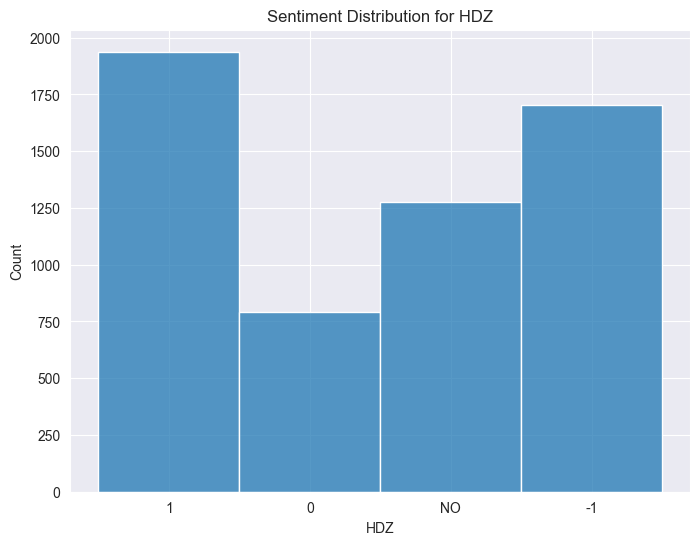

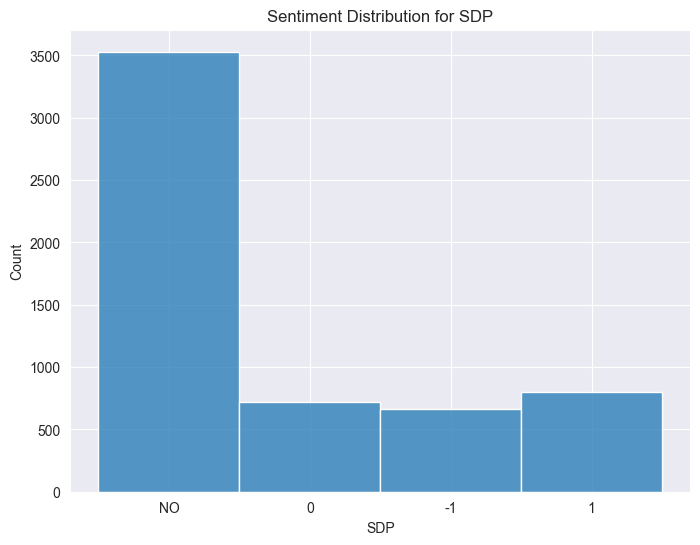

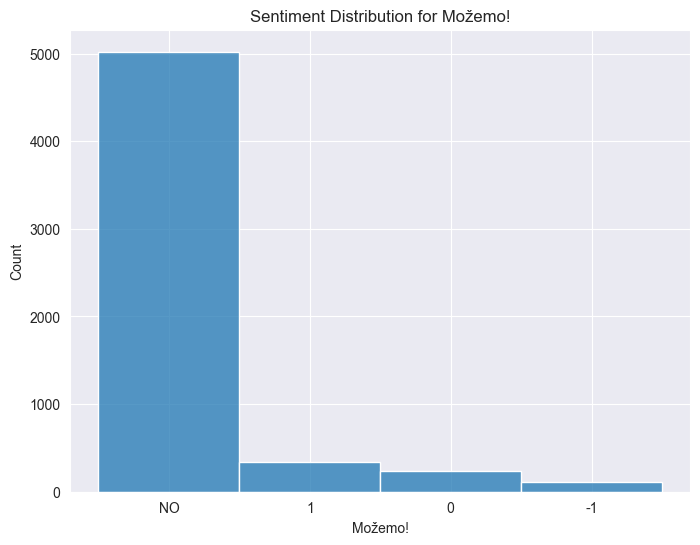

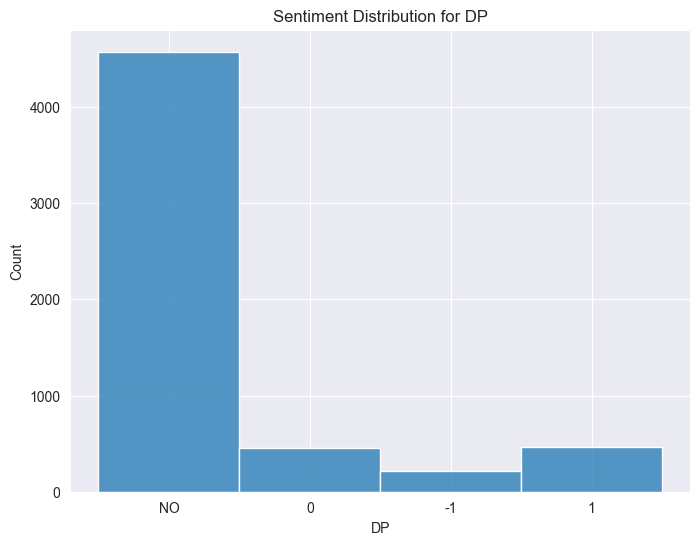

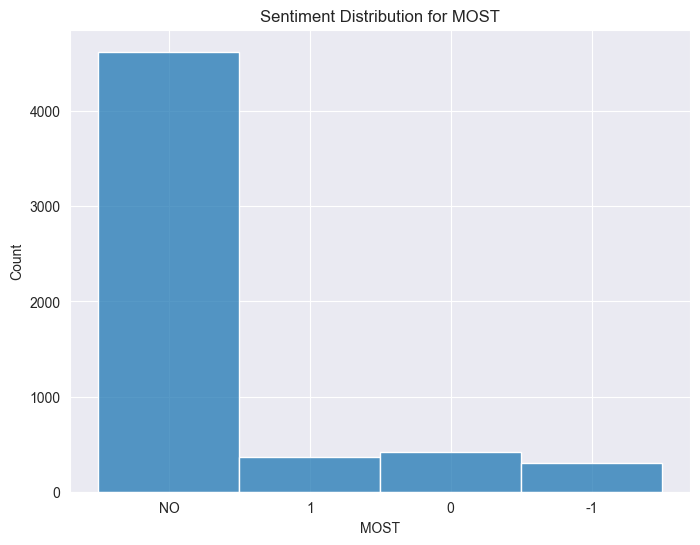

In [3]:
# Plot the distribution of sentiment for each party
parties = ['HDZ', 'SDP', 'Možemo!', 'DP', 'MOST']
sentiment_order = [-1, 0, 1, 'NO']
for party in parties:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=party, kde=False, bins=sentiment_order, discrete=True)
    plt.title(f'Sentiment Distribution for {party}')
plt.show()

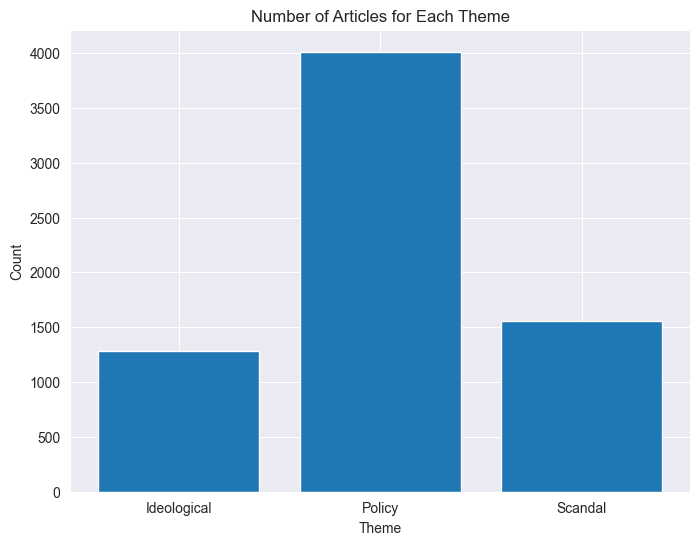

In [4]:
# Define the themes
themes = ['Ideological', 'Policy', 'Scandal']

# Initialize a list to store the counts
counts = []

# For each theme, count the number of articles that are labeled as '1'
for theme in themes:
    counts.append(df[df[theme] == 1].shape[0])

# Create a bar plot
plt.figure(figsize=(8,6))
plt.bar(themes, counts)
plt.title('Number of Articles for Each Theme')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.show()


In [5]:
# convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# create a new column for the year and month
df['year_month'] = df['date'].dt.to_period('M')

# initialize an empty dataframe to store the mean sentiments
mean_sentiments_df = pd.DataFrame()
mean_sentiments_weighted_df = pd.DataFrame()

#for each party, calculate the mean sentiment for each month
for party in parties:
    df[party] = pd.to_numeric(df[party], errors='coerce')
    mean_sentiments_df[party] = df.groupby('year_month')[party].mean()

df["Impact"] = pd.to_numeric(df["Impact"], errors='coerce')

# weighted sentiment by article impact
for party in parties:
    df[party] = pd.to_numeric(df[party], errors='coerce')
    mean_sentiments_weighted_df[party] = (df[party] * df['Impact']).groupby(df['year_month']).sum() / df['Impact'].groupby(df['year_month']).sum()

mean_sentiments_df.to_csv(os.path.join(DATA_DIR, "mean_sentiments.csv"))
mean_sentiments_weighted_df.to_csv(os.path.join(DATA_DIR, "mean_sentiments_weighted.csv"))

mean_sentiments_df.reset_index(inplace=True)
mean_sentiments_weighted_df.reset_index(inplace=True)

mean_sentiments_df

,year_month,HDZ,SDP,Možemo!,DP,MOST
0,2020-06,0.054598,-0.019324,0.628571,0.387097,0.219178
1,2020-07,0.422857,-0.011765,0.536585,0.361446,0.257143
2,2020-08,0.100000,0.100000,0.500000,0.166667,0.000000
3,2020-09,0.461538,-0.187500,0.166667,0.200000,0.142857
4,2020-10,-0.200000,0.333333,0.500000,0.545455,1.000000
5,2020-11,0.067568,0.131579,0.166667,0.222222,-0.375000
6,2020-12,-0.044444,0.188679,0.473684,0.296296,0.105263
7,2021-01,-0.193103,0.187500,0.416667,0.068966,-0.148148
8,2021-02,0.091667,0.338983,0.545455,0.500000,0.181818
9,2021-03,0.191011,0.127660,0.416667,0.227273,-0.062500


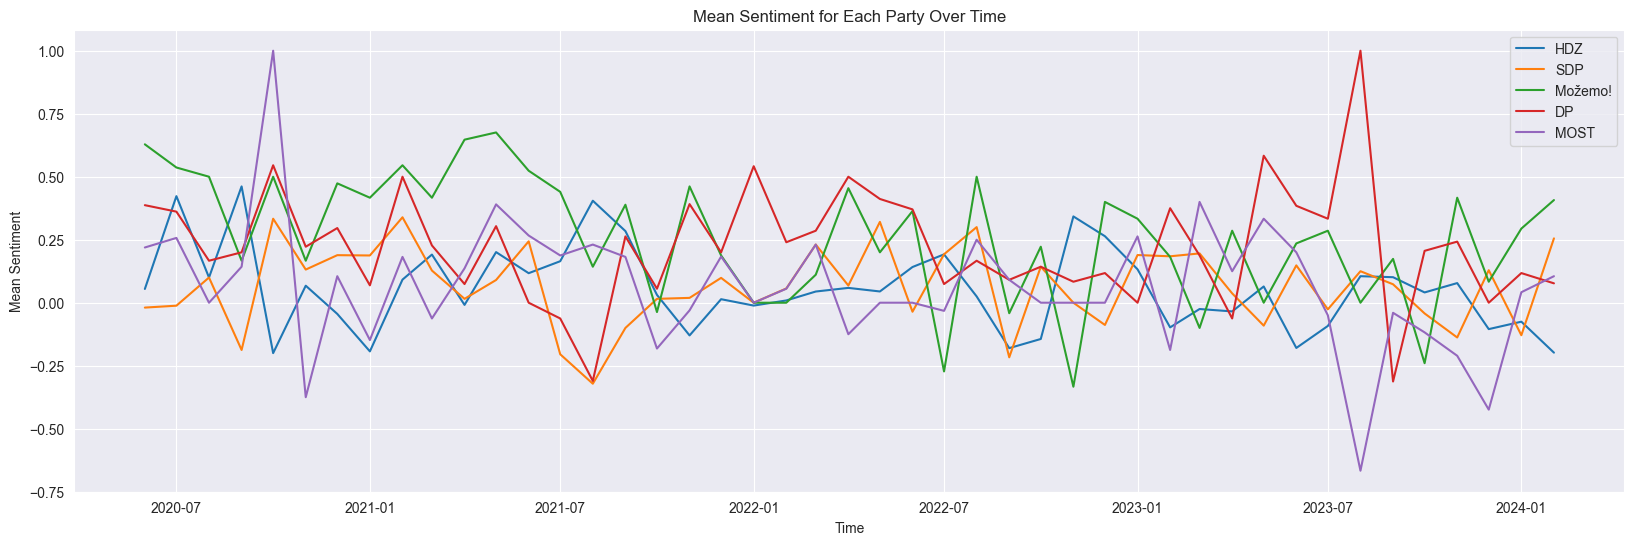

In [6]:
mean_sentiments_df['year_month'] = mean_sentiments_df['year_month'].dt.to_timestamp()

# For each party, plot a line plot of the mean sentiment over time
plt.figure(figsize=(20,6))
for party in parties:
    plt.plot(mean_sentiments_df['year_month'], mean_sentiments_df[party], label=party)

plt.title('Mean Sentiment for Each Party Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment')
plt.legend()
plt.show()

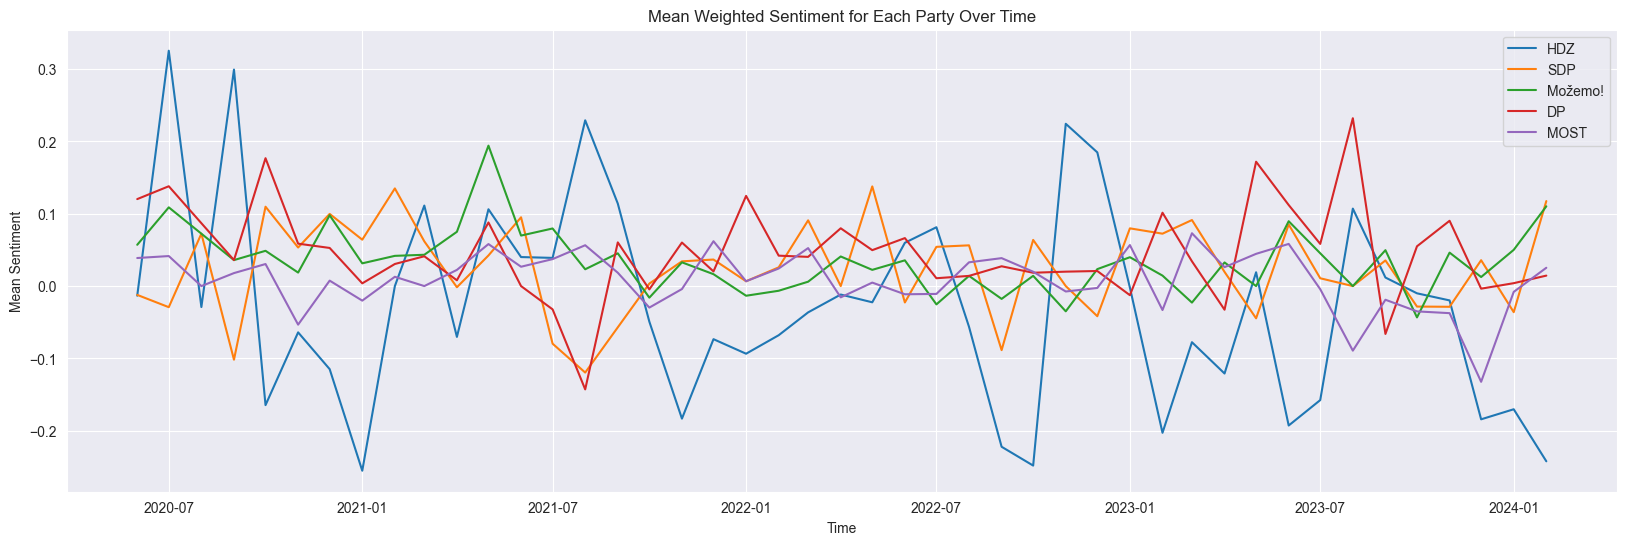

In [7]:
mean_sentiments_weighted_df['year_month'] = mean_sentiments_weighted_df['year_month'].dt.to_timestamp()

# For each party, plot a line plot of the mean sentiment over time
plt.figure(figsize=(20,6))
for party in parties:
    plt.plot(mean_sentiments_weighted_df['year_month'], mean_sentiments_weighted_df[party], label=party)

plt.title('Mean Weighted Sentiment for Each Party Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment')
plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller


def adf_test(series: pd.DataFrame, title: str = ''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")


In [9]:
mean_sentiments_df

,year_month,HDZ,SDP,Možemo!,DP,MOST
0,2020-06-01,0.054598,-0.019324,0.628571,0.387097,0.219178
1,2020-07-01,0.422857,-0.011765,0.536585,0.361446,0.257143
2,2020-08-01,0.100000,0.100000,0.500000,0.166667,0.000000
3,2020-09-01,0.461538,-0.187500,0.166667,0.200000,0.142857
4,2020-10-01,-0.200000,0.333333,0.500000,0.545455,1.000000
5,2020-11-01,0.067568,0.131579,0.166667,0.222222,-0.375000
6,2020-12-01,-0.044444,0.188679,0.473684,0.296296,0.105263
7,2021-01-01,-0.193103,0.187500,0.416667,0.068966,-0.148148
8,2021-02-01,0.091667,0.338983,0.545455,0.500000,0.181818
9,2021-03-01,0.191011,0.127660,0.416667,0.227273,-0.062500


In [10]:
mean_sentiments_df

,year_month,HDZ,SDP,Možemo!,DP,MOST
0,2020-06-01,0.054598,-0.019324,0.628571,0.387097,0.219178
1,2020-07-01,0.422857,-0.011765,0.536585,0.361446,0.257143
2,2020-08-01,0.100000,0.100000,0.500000,0.166667,0.000000
3,2020-09-01,0.461538,-0.187500,0.166667,0.200000,0.142857
4,2020-10-01,-0.200000,0.333333,0.500000,0.545455,1.000000
5,2020-11-01,0.067568,0.131579,0.166667,0.222222,-0.375000
6,2020-12-01,-0.044444,0.188679,0.473684,0.296296,0.105263
7,2021-01-01,-0.193103,0.187500,0.416667,0.068966,-0.148148
8,2021-02-01,0.091667,0.338983,0.545455,0.500000,0.181818
9,2021-03-01,0.191011,0.127660,0.416667,0.227273,-0.062500


In [11]:
data_df = load_and_prepare_data('../../../data/monthly-time-series/AI-izbori_stranke_krace_v2_INFL.csv', keep_columns=['NEODLUCNI', 'INFLACIJA'])
data_df.reset_index(inplace=True)
data_df.rename(columns={'index': 'year_month'}, inplace=True)
data_df

,year_month,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
0,2020-06-01,25.4,22.5,6.9,10.8,2.7,9.2,1.0
1,2020-07-01,30.2,18.4,8.2,6.9,8.7,8.8,1.0
2,2020-08-01,33.1,16.4,7.0,6.1,8.6,9.9,1.0
3,2020-09-01,33.7,17.1,6.2,7.9,8.2,11.8,1.0
4,2020-10-01,32.5,18.7,7.3,8.4,6.7,9.9,1.0
5,2020-11-01,31.5,17.6,7.4,7.5,6.5,10.5,0.7
6,2020-12-01,30.8,16.2,8.3,9.4,8.6,5.1,0.1
7,2021-01-01,31.1,16.6,7.8,7.3,9.6,8.3,-0.3
8,2021-02-01,30.9,17.2,8.0,6.8,9.3,13.3,0.3
9,2021-03-01,29.1,16.0,7.3,6.2,9.4,16.6,1.2


In [12]:
mean_sentiments_df.rename(columns={'HDZ': 'HDZ_senti', 'SDP': 'SDP_senti', 'DP': 'DP_senti', 'Možemo!': 'MOZEMO_senti', 'MOST': 'MOST_senti'}, inplace=True)
mean_sentiments_weighted_df.rename(columns={'HDZ': 'HDZ_senti', 'SDP': 'SDP_senti', 'DP': 'DP_senti', 'Možemo!': 'MOZEMO_senti', 'MOST': 'MOST_senti'}, inplace=True)

merged_df = pd.merge(mean_sentiments_df, data_df, on='year_month')
merged_df_weighted = pd.merge(mean_sentiments_weighted_df, data_df, on='year_month')

In [13]:
merged_df

,year_month,HDZ_senti,SDP_senti,MOZEMO_senti,DP_senti,MOST_senti,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
0,2020-06-01,0.054598,-0.019324,0.628571,0.387097,0.219178,25.4,22.5,6.9,10.8,2.7,9.2,1.0
1,2020-07-01,0.422857,-0.011765,0.536585,0.361446,0.257143,30.2,18.4,8.2,6.9,8.7,8.8,1.0
2,2020-08-01,0.100000,0.100000,0.500000,0.166667,0.000000,33.1,16.4,7.0,6.1,8.6,9.9,1.0
3,2020-09-01,0.461538,-0.187500,0.166667,0.200000,0.142857,33.7,17.1,6.2,7.9,8.2,11.8,1.0
4,2020-10-01,-0.200000,0.333333,0.500000,0.545455,1.000000,32.5,18.7,7.3,8.4,6.7,9.9,1.0
5,2020-11-01,0.067568,0.131579,0.166667,0.222222,-0.375000,31.5,17.6,7.4,7.5,6.5,10.5,0.7
6,2020-12-01,-0.044444,0.188679,0.473684,0.296296,0.105263,30.8,16.2,8.3,9.4,8.6,5.1,0.1
7,2021-01-01,-0.193103,0.187500,0.416667,0.068966,-0.148148,31.1,16.6,7.8,7.3,9.6,8.3,-0.3
8,2021-02-01,0.091667,0.338983,0.545455,0.500000,0.181818,30.9,17.2,8.0,6.8,9.3,13.3,0.3
9,2021-03-01,0.191011,0.127660,0.416667,0.227273,-0.062500,29.1,16.0,7.3,6.2,9.4,16.6,1.2


In [14]:
merged_df_weighted

,year_month,HDZ_senti,SDP_senti,MOZEMO_senti,DP_senti,MOST_senti,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
0,2020-06-01,-0.013304,-0.012195,0.057095,0.120288,0.038803,25.4,22.5,6.9,10.8,2.7,9.2,1.0
1,2020-07-01,0.325477,-0.029181,0.108866,0.138047,0.041526,30.2,18.4,8.2,6.9,8.7,8.8,1.0
2,2020-08-01,-0.028986,0.072464,0.072464,0.086957,0.000000,33.1,16.4,7.0,6.1,8.6,9.9,1.0
3,2020-09-01,0.299401,-0.101796,0.035928,0.035928,0.017964,33.7,17.1,6.2,7.9,8.2,11.8,1.0
4,2020-10-01,-0.164634,0.109756,0.048780,0.176829,0.030488,32.5,18.7,7.3,8.4,6.7,9.9,1.0
5,2020-11-01,-0.064000,0.053333,0.018667,0.058667,-0.053333,31.5,17.6,7.4,7.5,6.5,10.5,0.7
6,2020-12-01,-0.114878,0.099812,0.097928,0.052731,0.007533,30.8,16.2,8.3,9.4,8.6,5.1,0.1
7,2021-01-01,-0.255346,0.064151,0.031447,0.003774,-0.020126,31.1,16.6,7.8,7.3,9.6,8.3,-0.3
8,2021-02-01,0.000000,0.135048,0.041801,0.030547,0.012862,30.9,17.2,8.0,6.8,9.3,13.3,0.3
9,2021-03-01,0.111340,0.061856,0.043299,0.041237,0.000000,29.1,16.0,7.3,6.2,9.4,16.6,1.2


In [15]:
print("HDZ: ", merged_df["HDZ"].corr(merged_df["HDZ_senti"]))
print("SDP: ", merged_df["SDP"].corr(merged_df["SDP_senti"]))
print("MOST: ", merged_df["MOST"].corr(merged_df["MOST_senti"]))
print("DP: ", merged_df["DP"].corr(merged_df["DP_senti"]))
print("Možemo!: ", merged_df["MOZEMO"].corr(merged_df["MOZEMO_senti"]))


HDZ:  0.2738407165197717
SDP:  0.13408381455576326
MOST:  -0.11885426758263508
DP:  0.11184781495245165
Možemo!:  -0.0444072116890173


In [16]:
print("HDZ: ", merged_df_weighted["HDZ"].corr(merged_df_weighted["HDZ_senti"]))
print("SDP: ", merged_df_weighted["SDP"].corr(merged_df_weighted["SDP_senti"]))
print("MOST: ", merged_df_weighted["MOST"].corr(merged_df_weighted["MOST_senti"]))
print("DP: ", merged_df_weighted["DP"].corr(merged_df_weighted["DP_senti"]))
print("Možemo!: ", merged_df_weighted["MOZEMO"].corr(merged_df_weighted["MOZEMO_senti"]))

HDZ:  0.23959908903091912
SDP:  0.09321911566200215
MOST:  0.0967099926749049
DP:  0.25989135622596793
Možemo!:  0.04120031829598355


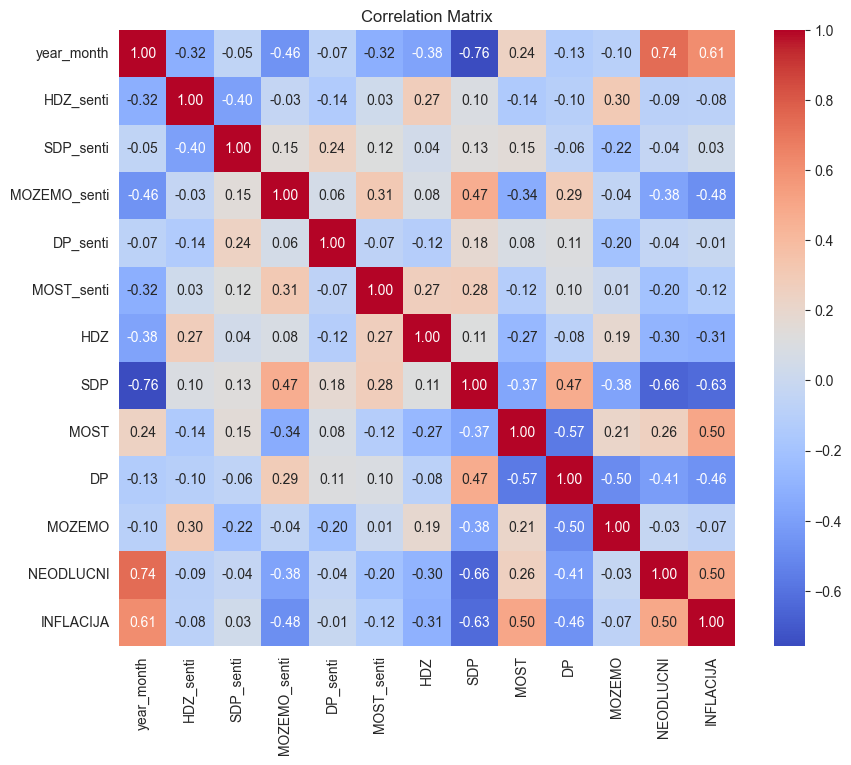

In [17]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

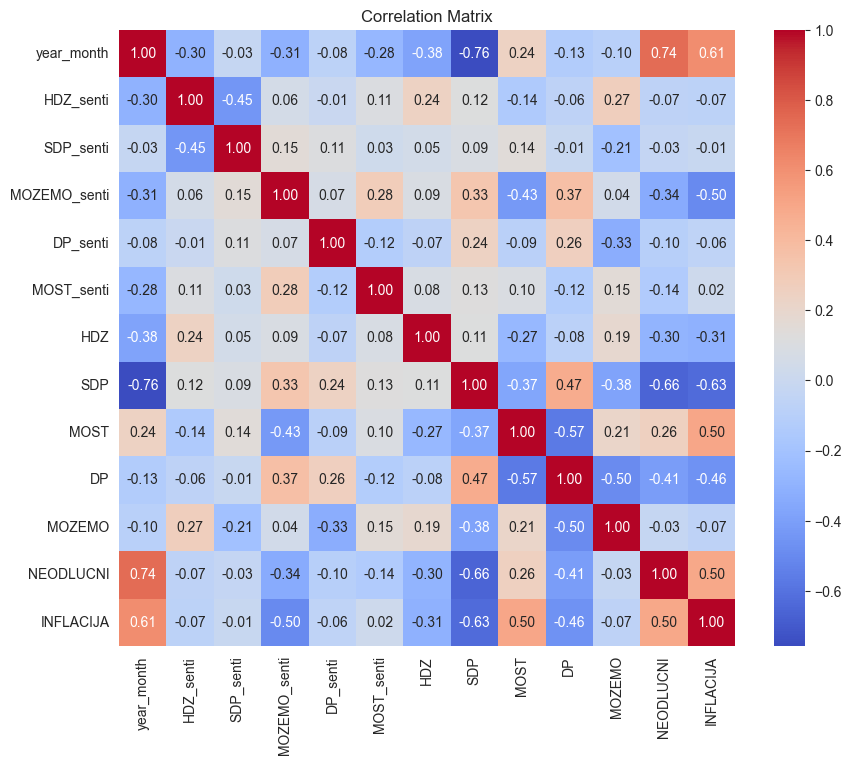

In [18]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df_weighted.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [19]:
merged_df.to_csv("../../../data/monthly-time-series/full_data_normal_senti.csv")
merged_df_weighted.to_csv("../../../data/monthly-time-series/full_data_weighted_senti.csv")